In [1]:
! gdown --id 15rT9a51loB3KK2BKgtmPxVtmAubZnVbQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15rT9a51loB3KK2BKgtmPxVtmAubZnVbQ
To: /content/dataset_2class.zip
100% 111M/111M [00:03<00:00, 34.5MB/s]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

EXTRACT ZIP

In [ ]:
#extract zip

In [3]:
import zipfile

local_zip = '/content/dataset_2class.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [35]:
import os

base_dir = '/content/dataset_2class'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['valid', 'test', 'train']

Contents of train directory:
['healthy', 'nuklear']

Contents of validation directory:
['healthy', 'nuklear']


In [5]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Directory with training pictures
train_nuklear_dir = os.path.join(train_dir, 'nuklear')
train_healty_dir = os.path.join(train_dir, 'healthy')

# Directory with validation pictures
validation_nuklear_dir = os.path.join(validation_dir, 'nuklear')
validation_healty_dir = os.path.join(validation_dir, 'healthy')

# Directory with testing pictures
test_nuklear_dir = os.path.join(test_dir, 'nuklear')
test_healty_dir = os.path.join(test_dir, 'healthy')

In [6]:
#lihat isi
train_nuklear_fnames = os.listdir( train_nuklear_dir )
train_healty_fnames = os.listdir(train_healty_dir)



print(train_nuklear_fnames[:10])
print(train_healty_fnames[:10])

['D1_3df12652-60a5-11ec-8402-0a7404972c70_jpg.rf.2e2fe2473d17667cd5ec982bf5a65df7.jpg', 'D1_18433f72-60a5-11ec-8402-0a7404972c70_jpg.rf.b94e2d71c90a329e42cbb47f832a344f.jpg', 'D2_128bf2f9-60a5-11ec-8402-0a7404972c70_jpg.rf.f71036dff4b3639ffab8a5dfb5b36de8.jpg', 'D1_1169de56-60a5-11ec-8402-0a7404972c70_jpg.rf.11d3f5570b4134185ae380a00acf4b03.jpg', 'D2_0dce35c7-60a5-11ec-8402-0a7404972c70_jpg.rf.1b0e9509312ba3acb2f00b84180add9c.jpg', 'D1_106e6469-60a5-11ec-8402-0a7404972c70_jpg.rf.1dfa136063beb7691b867715e10c04b6.jpg', 'D0_1009aac5-60a5-11ec-8402-0a7404972c70_jpg.rf.3579fcbf0c1e3fa1f24c71b3920fce4b.jpg', 'D0_10c1f73d-60a5-11ec-8402-0a7404972c70_jpg.rf.fa0430d315336c5df5aff8b8ec23e893.jpg', 'D1_0e79abee-60a5-11ec-8402-0a7404972c70_jpg.rf.18451523f72ea0535886455ee3288da7.jpg', 'D0_10f5e307-60a5-11ec-8402-0a7404972c70_jpg.rf.4dc79d6137b9fdb02c341a080f244fbb.jpg']
['D20_29fc0e97-60a5-11ec-8402-0a7404972c70_jpg.rf.e52d477c12b98e38885db669bb533cfc.jpg', 'D21_03b7f653-60a5-11ec-8402-0a7404972c7

In [7]:
#lihat jumlah data masing-masing file

print('total training nuklear images :', len(os.listdir(      train_nuklear_dir ) ))
print('total training Healty eye images :', len(os.listdir(      train_healty_dir ) ))

print('total validation nuklear images :', len(os.listdir(      validation_nuklear_dir ) ))
print('total validation Healty eye images :', len(os.listdir(      validation_healty_dir ) ))

print('total test nuklear images :', len(os.listdir(      test_nuklear_dir ) ))
print('total test Healty eye images :', len(os.listdir(      test_healty_dir ) ))



total training nuklear images : 1344
total training Healty eye images : 1344
total validation nuklear images : 168
total validation Healty eye images : 168
total test nuklear images : 168
total test Healty eye images : 168


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Untuk lihat gambar nuklear sklerosis dan ringworm

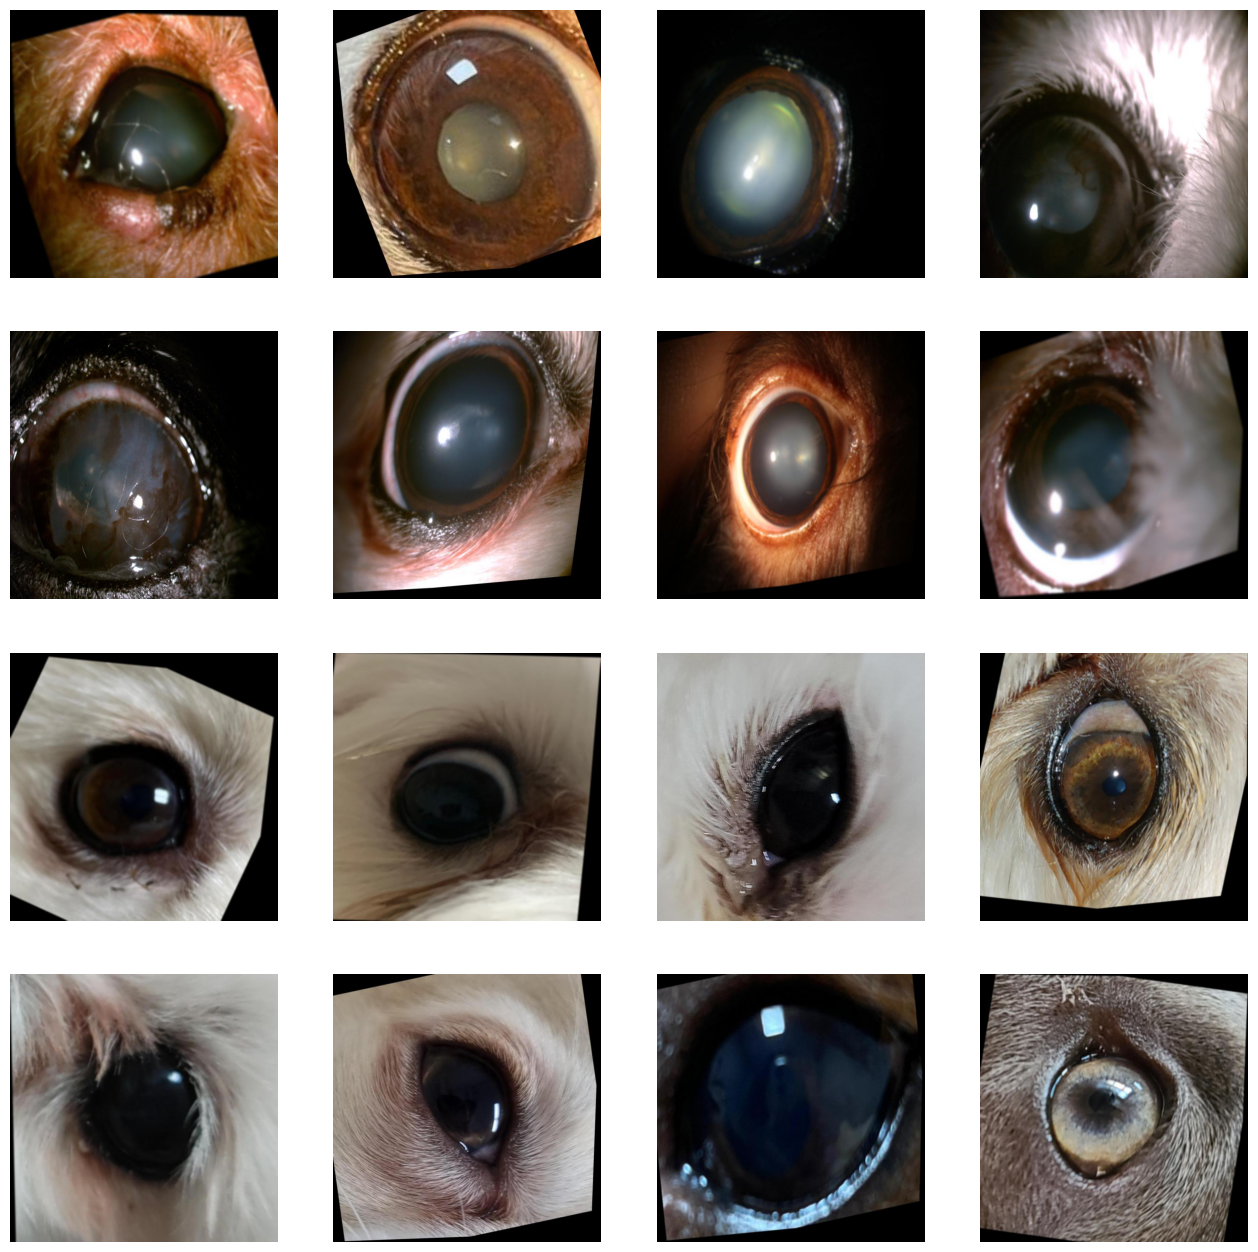

In [9]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_nuklear_pix = [os.path.join(train_nuklear_dir, fname)
                for fname in train_nuklear_fnames[ pic_index-8:pic_index]
               ]

next_healty_pix = [os.path.join(train_healty_dir, fname)
                for fname in train_healty_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_nuklear_pix+next_healty_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
#(learning_rate=0.0001),

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=25,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 2688 images belonging to 2 classes.
Found 336 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
            train_generator,
            epochs=40,
            steps_per_epoch=20,
            validation_data=validation_generator,
            validation_steps=10,
            callbacks=[callback],
            verbose=1
            )
test_data = model.evaluate(test_generator)

Epoch 1/40
20/20 [==============================] - 95s 5s/step - loss: 0.6652 - accuracy: 0.6280 - val_loss: 0.6502 - val_accuracy: 0.6600
Epoch 2/40
20/20 [==============================] - 81s 4s/step - loss: 0.5705 - accuracy: 0.7200 - val_loss: 0.5246 - val_accuracy: 0.7560
Epoch 3/40
20/20 [==============================] - 90s 5s/step - loss: 0.4965 - accuracy: 0.7720 - val_loss: 0.4442 - val_accuracy: 0.8200
Epoch 4/40
20/20 [==============================] - 91s 5s/step - loss: 0.4143 - accuracy: 0.8220 - val_loss: 0.3443 - val_accuracy: 0.8520
Epoch 5/40
20/20 [==============================] - 90s 5s/step - loss: 0.3728 - accuracy: 0.8260 - val_loss: 0.2903 - val_accuracy: 0.9160
Epoch 6/40
20/20 [==============================] - 97s 5s/step - loss: 0.3662 - accuracy: 0.8484 - val_loss: 0.3142 - val_accuracy: 0.9000
Epoch 7/40
20/20 [==============================] - 90s 5s/step - loss: 0.3142 - accuracy: 0.8627 - val_loss: 0.2058 - val_accuracy: 0.9160
Epoch 8/40
20/20 [==

In [15]:
#print(test_data)
print('Test loss:', test_data[0])
print('Test accuracy:', test_data[1])

Test loss: 0.20345504581928253
Test accuracy: 0.925595223903656


In [42]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

# Fungsi untuk melakukan prediksi
def predict(image):
    image = image.resize((150, 150))  # Menyesuaikan ukuran gambar jika diperlukan
    image_array = np.array(image) / 255.0  # Mengonversi gambar menjadi array dan normalisasi
    image_array = np.expand_dims(image_array, axis=0)  # Menambahkan dimensi batch
    probabilities = model.predict(image_array)[0]
    class_idx = np.argmax(probabilities)

    return {class_labels[class_idx]: probabilities[class_idx]}

# Memuat gambar dari komputer
uploaded = files.upload()
image_paths = list(uploaded.keys())

class_labels = ['healthy','nuklear']

for image_path in image_paths:
    # Membaca gambar
    image = Image.open(image_path)

    # Melakukan prediksi
    prediction = predict(image)

    # Menampilkan hasil prediksi
    class_name = list(prediction.keys())[0]
    confidence = list(prediction.values())[0]
    print("Prediksi untuk %s: class: %s, confidence: %.2f%%" % (image_path, class_name, confidence * 100))




Saving sehat banget.jpg to sehat banget (3).jpg
1/1 [==============================] - 0s 58ms/step
Prediksi untuk sehat banget.jpg: class: healthy, confidence: 50.13%


1/1 [==============================] - 0s 148ms/step


<ipython-input-43-def6c19c42e2>:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


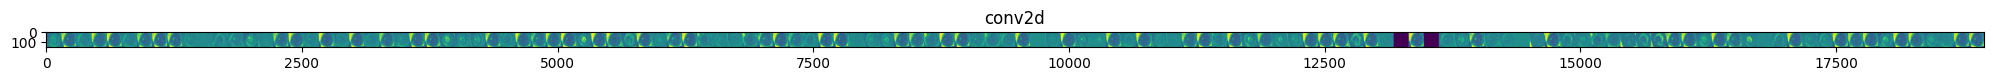

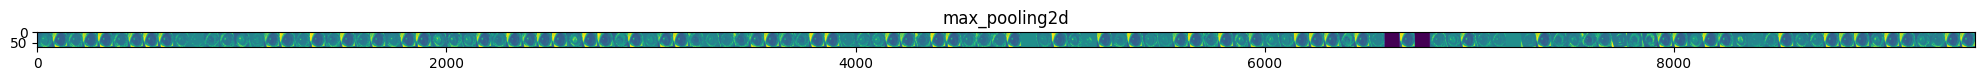

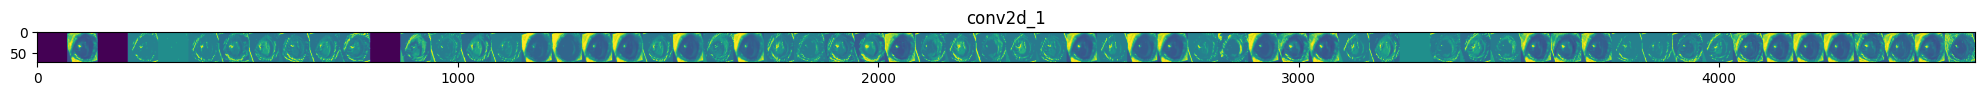

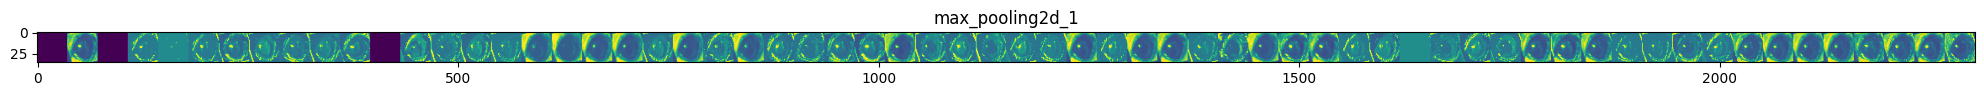

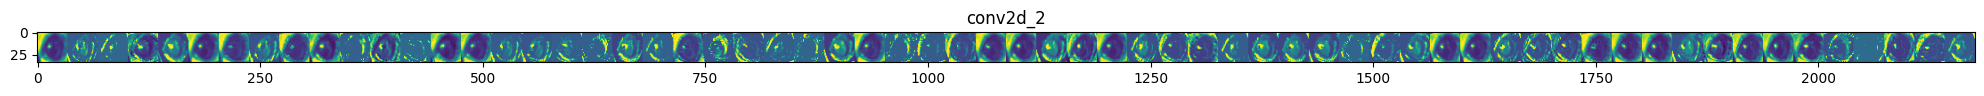

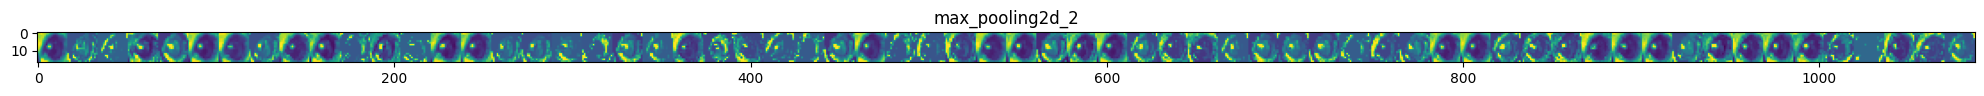

In [43]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
nuklear_img_files = [os.path.join(train_nuklear_dir, f) for f in train_nuklear_fnames]
healthy_img_files = [os.path.join(train_healty_dir, f) for f in train_healty_fnames]

img_path = random.choice(nuklear_img_files + healthy_img_files )
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 25. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

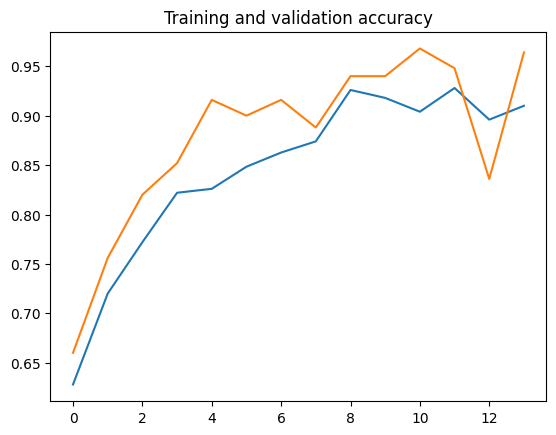

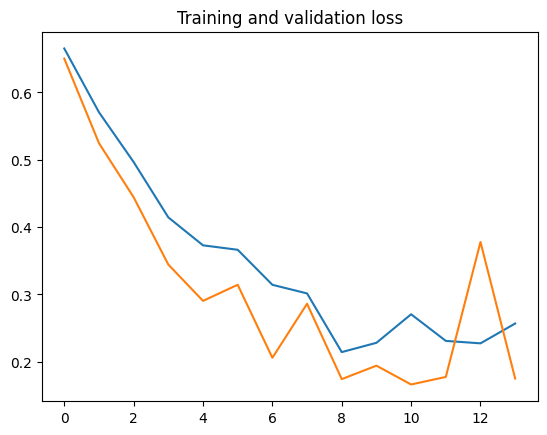

In [44]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [45]:
model.save('/content/model.h5')

In [46]:
model.save('/content/saved_model_file')

In [47]:
!zip -r /content/saved_model_file.zip /content/saved_model_file

  adding: content/saved_model_file/ (stored 0%)
  adding: content/saved_model_file/assets/ (stored 0%)
  adding: content/saved_model_file/fingerprint.pb (stored 0%)
  adding: content/saved_model_file/keras_metadata.pb (deflated 92%)
  adding: content/saved_model_file/variables/ (stored 0%)
  adding: content/saved_model_file/variables/variables.index (deflated 65%)
  adding: content/saved_model_file/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_model_file/saved_model.pb (deflated 88%)


In [48]:
from google.colab import files
files.download('saved_model_file.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>